## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 4 #

### esercizio 4.1 

In questo primo esercizio abbiamo apportato dei miglioramenti ad un codice di simulazione di Dinamica Molecolare facente uso dell'algoritmo di Verlet. Nella fattispecie abbiamo aggiunto le seguenti funzionalità:
- la possibilità di (ri)iniziare una simulazione partendo dalle ultime due configurazioni ottenute nella simulazione precedente.
- la possibilità di riscalare le velocità iniziali delle particelle in modo da corrispondere a quelle previste dalla temperatura di input del sistema.

Il codice originale infatti iniziava la simulazione partendo da un'unica distribuzione spaziale, generando le velocità in modo random e controllando che non ci fosse una velocità risultante totale del sistema.
Questa condizione iniziale però non rispetta la temperatura data in input del sistema, all'inizio di ogni simulazione si osservava una brusca variazione della stessa e successivamente un suo assestamento ad un valore diverso da quello richiesto. La distribuzione di velocità infatti, piuttosto che randomica dovrebbe rispettare la distribuzione di Boltzmann.

Per ovviare a questo problema, dalla seconda simulazione in avanti, abbiamo sfruttato le ultime due configurazioni spaziali della simulazione precedente nel seguente modo. Conoscendo $\vec{r}(t)$ e $\vec{r}(t-dt)$, abbiamo calcolato $\vec{r}(t+dt)$ con l'algoritmo di Verlet e abbiamo poi ottenuto $\vec{v}(t+dt/2)$. Supponendo le velocità distribuite secondo la distribuzione di Boltzamann abbiamo stimato la temperatura effettiva del sistema $T(t+dt/2)$. Dopodichè, confrontando la temperatura ottenuta con quella richiesta dalle condizioni iniziali, abbiamo riscalato tutte le velocità $\vec{v}_s(t)$ in modo che corrispondessero a tale temperatura. Con $\vec{v}_s(t)$ abbiamo stimato una nuova vecchia configurazione: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$. Avendo $\vec{r}_{new}(t)$ e $\vec{r}(t+dt)$ abbiamo iniziato la simulazione usando il codice già fornito in partenza. 
Abbiamo dato la possibilità di usufruire di tale "ripartenza" aggiungendo una nuova variabile di input, il dato booleano Reboot, tale che:
- per Reboot uguale a 0 le velocità vengono generate in modo random.
- per Reboot uguale a 1 il codice implementa la ripartenza di cui sopra.
In entrambi i casi alla fine della simulazione vengono salvate le ultime due configurazioni prodotte.

Fatte queste aggiunte per fare una simulazione di dinamica molecolare con questo codice diventa necessario ripetere più volte la simulazione stessa, la prima volta con Reboot uguale a 0 e dalla successiva con Reboot uguale a 1, al fine di raggiungere una condizione di equilibrio.





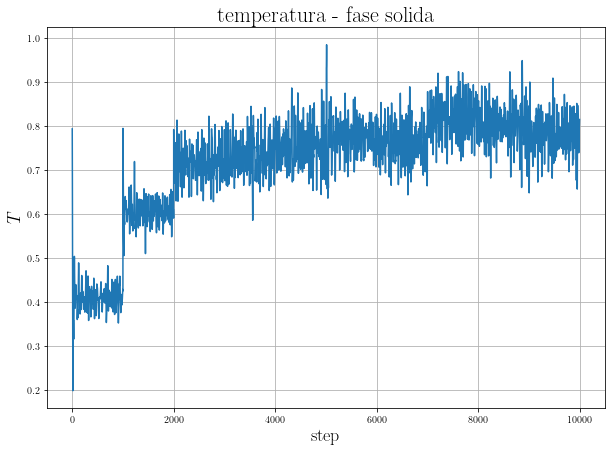

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

temp = np.loadtxt('temp_solido.dat')
x = np.arange(temp.size)


plt.figure(figsize=(10,7))

plt.plot(x,temp)
plt.title("temperatura - fase solida", fontsize = 22)
plt.xlabel('step', fontsize = 18)
plt.ylabel('$T$', fontsize=18)
plt.grid(True)


Si nota come dalla quarta ripartenza il sistema si stabilizza.

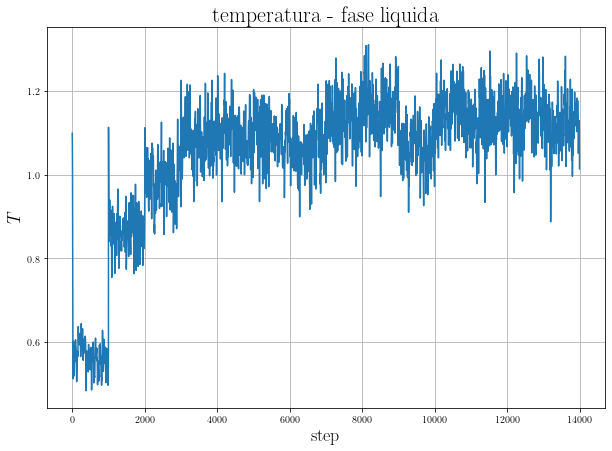

In [3]:
import matplotlib.pyplot as plt
import numpy as np


temp = np.loadtxt('temp_liquido.dat')
x = np.arange(temp.size)

plt.figure(figsize=(10,7))

plt.plot(x,temp)
plt.title("temperatura - fase liquida", fontsize = 22)
plt.xlabel('step', fontsize = 18)
plt.ylabel('$T$', fontsize=18)
plt.grid(True)

Si nota come dalla quarta ripartenza il sistema si stabilizza.

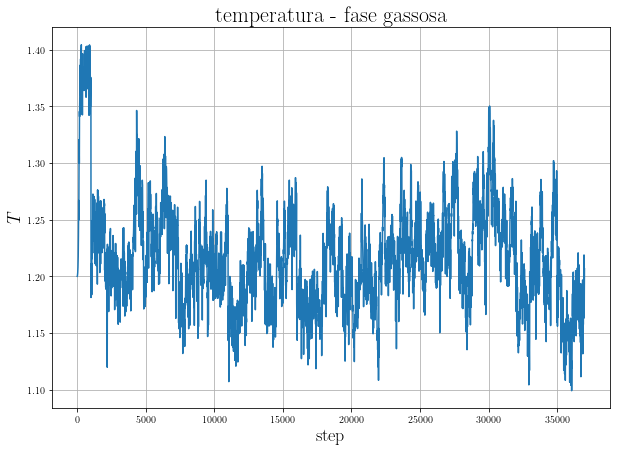

In [6]:
import matplotlib.pyplot as plt
import numpy as np


temp = np.loadtxt('temp_gas.dat')
x = np.arange(temp.size)
plt.figure(figsize=(10,7))

plt.plot(x,temp)
plt.title("temperatura - fase gassosa", fontsize = 22)
plt.xlabel('step', fontsize = 18)
plt.ylabel('$T$', fontsize=18)
plt.grid(True)

In questo caso vediamo come la stabilizzazione del sistema risulti più complicata, con i valori della temperatura ancora piuttosto oscillanti dopo diverse ripartenze.

### esercizio 4.2 

Il codice originale stampava solo i valori istantanei per l'energia totale per particell $E/N$, l'energia potenziale per particella $U/N$, quella cinetica $K/N$ e la temperatura $T$. In questo esercizio abbiamo incluso il metodo dei blocchi per stimare i valori medi di tali osservabili e le loro relative incertezze. 
Abbiamo dato la possibilità di specificare in input il numero di blocchi richiesti, con l'aggiunta della variabile nblocchi. 
Abbiamo usato il codice così modificato per l'esperienza dell'esercizio 4.3.

### esercizio 4.3 

Con le modifiche implementate negli esercizi precedenti abbiamo utilizzato il codice per fare una simulazione di un modello Lennard-Jones di Argon nelle sue tre diverse fasi. Abbiamo utilizzato i seguenti parametri: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu.

Abbiamo posto, per ogni fase, il sistema nelle seguenti condizioni:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Riportiamo di seguito i risultati ottenuti.


### solido

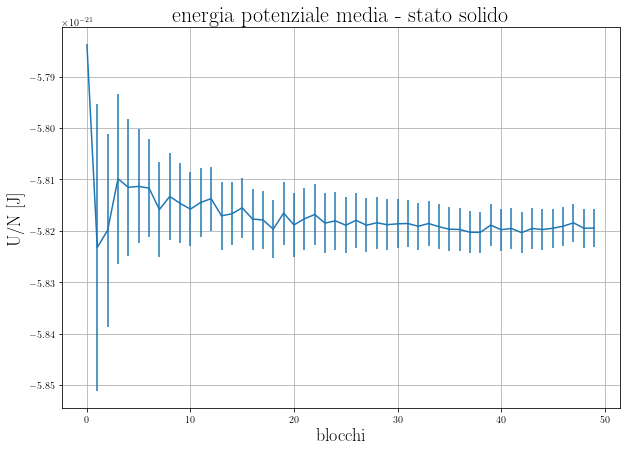

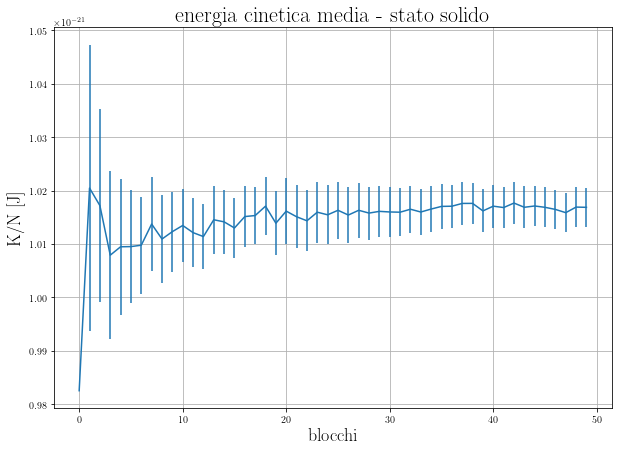

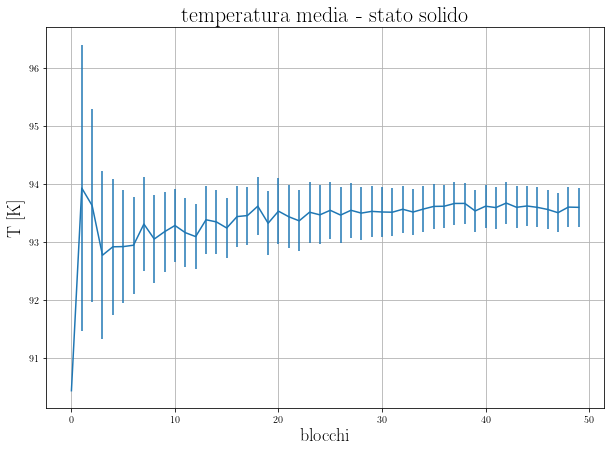

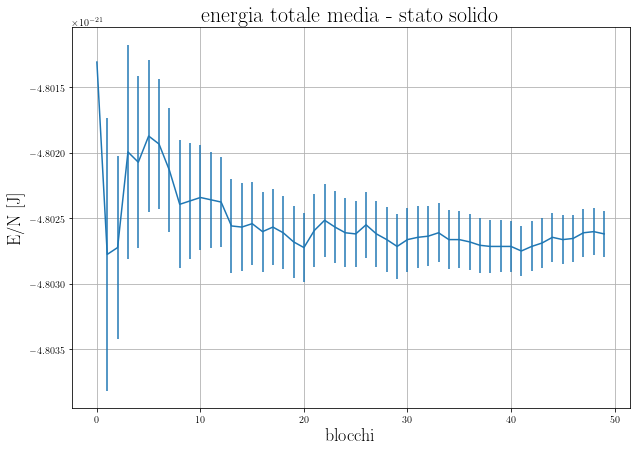

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

sigma = 0.34 #angstrom
f_T = 120. # fattore moltiplicativo temperatura in Kelvin
m = 39.948 #amu
f_V = 86.9156461925 * 10**(-23.) #fattore moltiplicativo dell'energia potenziale in Joule



#energia potenziale

f, error = np.loadtxt("sol_pot.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.grid(True)

plt.title("energia potenziale media - stato solido", fontsize=22)
plt.show()

#energia cinetica

f, error = np.loadtxt("sol_kin.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title("energia cinetica media - stato solido", fontsize=22)


plt.grid(True)
plt.show()

#temperatura

f, error = np.loadtxt("sol_temp.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_T*f,yerr=f_T*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('T [K]', fontsize=18)

plt.title("temperatura media - stato solido", fontsize=22)
plt.grid(True)
plt.show()

#energia totale

f, error = np.loadtxt("sol_en.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)

plt.title("energia totale media - stato solido", fontsize=22)
plt.grid(True)
plt.show()

### liquido

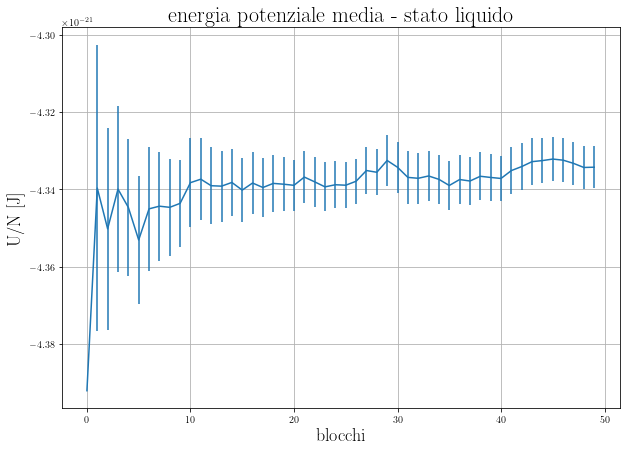

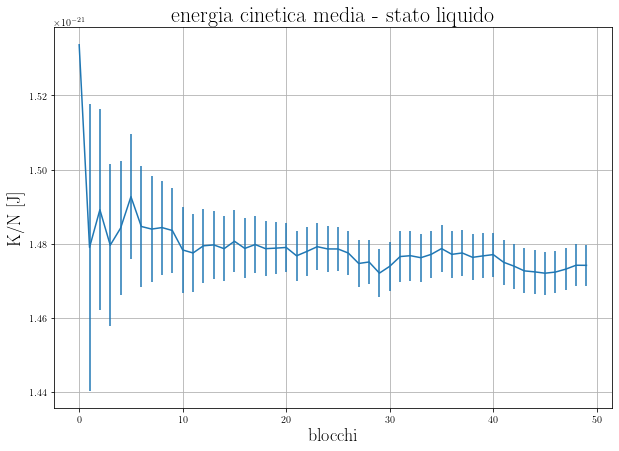

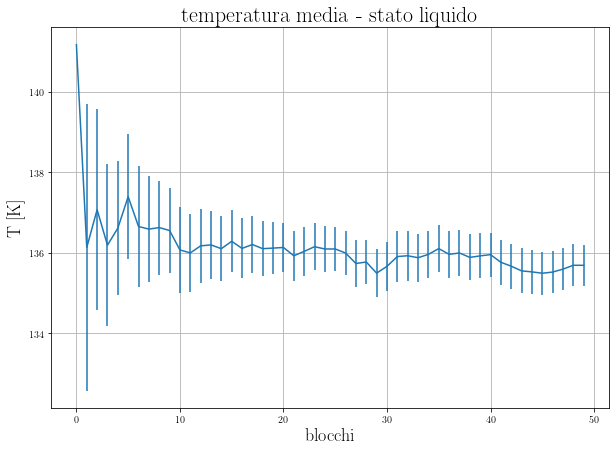

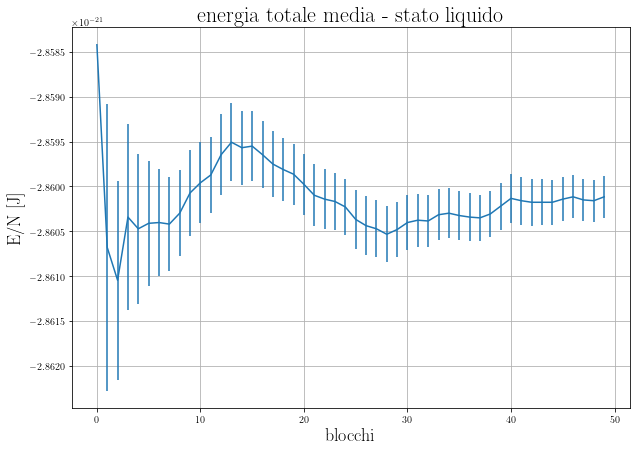

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

sigma = 0.34 #angstrom
f_T = 120. # fattore moltiplicativo temperatura in Kelvin
m = 39.948 #amu
f_V = 86.9156461925 * 10**(-23.) #fattore moltiplicativo dell'energia potenziale in Joule

#energia potenziale

f, error = np.loadtxt("liq_pot.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.grid(True)

plt.title("energia potenziale media - stato liquido", fontsize=22)
plt.show()

#energia cinetica

f, error = np.loadtxt("liq_kin.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title("energia cinetica media - stato liquido", fontsize=22)


plt.grid(True)
plt.show()

#temperatura

f, error = np.loadtxt("liq_temp.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_T*f,yerr=f_T*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('T [K]', fontsize=18)

plt.title("temperatura media - stato liquido", fontsize=22)
plt.grid(True)
plt.show()

#energia totale

f, error = np.loadtxt("liq_en.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)

plt.title("energia totale media - stato liquido", fontsize=22)
plt.grid(True)
plt.show()

### gas

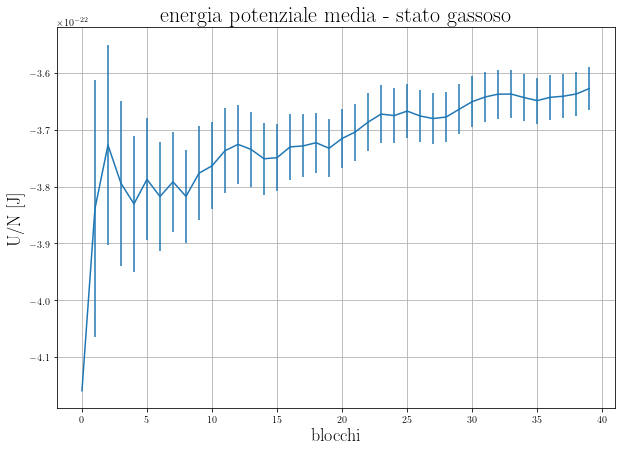

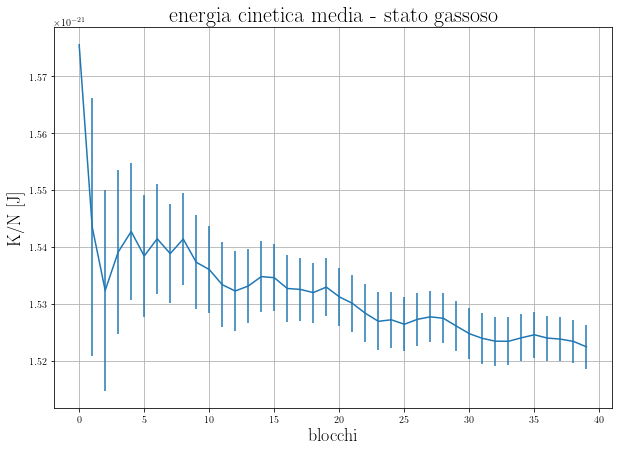

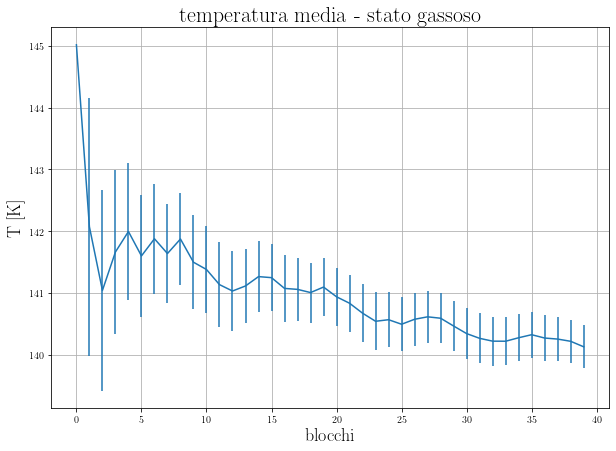

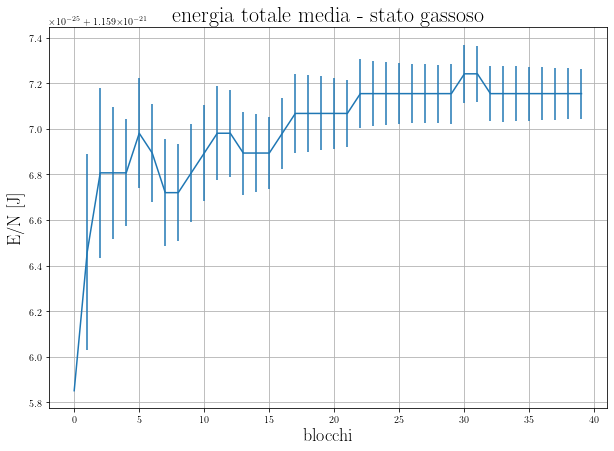

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

sigma = 0.34 #angstrom
f_T = 120. # fattore moltiplicativo temperatura in Kelvin
m = 39.948 #amu
f_V = 86.9156461925 * 10**(-23.) #fattore moltiplicativo dell'energia potenziale in Joule

#energia potenziale

f, error = np.loadtxt("gas_pot.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.grid(True)

plt.title("energia potenziale media - stato gassoso", fontsize=22)
plt.show()

#energia cinetica

f, error = np.loadtxt("gas_kin.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title("energia cinetica media - stato gassoso", fontsize=22)


plt.grid(True)
plt.show()

#temperatura

f, error = np.loadtxt("gas_temp.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_T*f,yerr=f_T*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('T [K]', fontsize=18)

plt.title("temperatura media - stato gassoso", fontsize=22)
plt.grid(True)
plt.show()

#energia totale

f, error = np.loadtxt("gas_en.dat", usecols=(0,1), delimiter=', ', unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)

plt.title("energia totale media - stato gassoso", fontsize=22)
plt.grid(True)
plt.show()

Date le difficoltà riscontrate con la simulazione della fase gassosa, abbiamo optato per dei blocchi più lunghi rispetto a quelli utilizzati per fase liquida e fase solida. Per le prime due fasi abbiamo infatti fatto simulazioni da $10^5$ step suddivisi in 50 blocchi, mentre nel caso del gas il numero di step era pari a $2 \times 10^5$ suddivisi in 40 blocchi.

Abbiamo riscontrato dei problemi di troncamento delle cifre decimali per quanto riguarda il valore dell'energia totale del gas.